In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (9,5)


In [4]:
# Upload your "EPL dataset.csv" to Colab files and set the filename below
df = pd.read_csv(r"C:\Users\HP\Desktop\LPU COURSES\Fifth Semester\INT 234 PREDICTIVE ANALYTICS\CA\EPL dataset.csv")
df


,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119
0,E0,1/9/2022,20:00,Leicester,Man United,0,1,A,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E0,1/10/2022,12:30,Arsenal,Tottenham,3,1,H,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,E0,1/10/2022,15:00,Bournemouth,Brentford,0,0,D,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,E0,1/10/2022,15:00,Crystal Palace,Chelsea,1,2,A,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E0,1/10/2022,15:00,Fulham,Newcastle,1,4,A,0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,E0,31/12/2022,15:00,Man City,Everton,1,1,D,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1136,E0,31/12/2022,15:00,Newcastle,Leeds,0,0,D,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1137,E0,31/12/2022,17:30,Brighton,Arsenal,2,4,A,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1138,E0,31/12/2023,14:00,Fulham,Arsenal,2,1,H,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Remove unwanted columns created during merge
df = df.loc[:, ~df.columns.str.contains("^Unnamed")]
df = df.dropna(axis=1, how="all")

print(df.shape)
df.head()

(1140, 106)


,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,1/9/2022,20:00,Leicester,Man United,0,1,A,0,1,...,2.28,0.25,2.00,1.90,1.96,1.96,2.06,1.96,1.99,1.89
1,E0,1/10/2022,12:30,Arsenal,Tottenham,3,1,H,1,1,...,2.13,-0.50,1.97,1.93,1.99,1.89,2.03,1.97,1.99,1.89
2,E0,1/10/2022,15:00,Bournemouth,Brentford,0,0,D,0,0,...,1.92,0.25,1.94,1.96,1.96,1.96,1.96,2.00,1.91,1.95
3,E0,1/10/2022,15:00,Crystal Palace,Chelsea,1,2,A,1,1,...,1.85,0.75,1.91,1.99,1.90,2.03,1.95,2.03,1.88,1.98
4,E0,1/10/2022,15:00,Fulham,Newcastle,1,4,A,0,3,...,1.95,0.25,1.73,2.08,1.79,2.15,1.81,2.19,1.78,2.10


In [8]:
# Drop rows with missing target
df = df.dropna(subset=["FTR"])

# Convert Date (optional but good practice)
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True, errors="coerce")

# Fill numeric missing values
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())


In [10]:
result_map = {"H":0, "D":1, "A":2}
df["FTR_encoded"] = df["FTR"].map(result_map)

df["FTR"].value_counts()


C:\Users\HP\AppData\Local\Temp\ipykernel_8740\2247688990.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["FTR_encoded"] = df["FTR"].map(result_map)


FTR
H    514
A    364
D    262
Name: count, dtype: int64

In [44]:
feature_cols = [
    "FTHG","FTAG",
    "HS","AS",
    "HST","AST",
    "HC","AC",
    "HF","AF",
    "B365H","B365D","B365A",
    "AvgH","AvgD","AvgA"
]

# keep only existing columns
feature_cols = [c for c in feature_cols if c in df.columns]

X = df[feature_cols]
y = df["FTR_encoded"]

X.head()


,FTHG,FTAG,HS,AS,HST,AST,HC,AC,HF,AF,B365H,B365D,B365A,AvgH,AvgD,AvgA
0,0,1,10,9,2,2,1,3,7,15,3.40,3.75,2.05,3.41,3.81,2.07
1,3,1,22,7,9,3,5,2,10,10,2.05,3.75,3.30,2.08,3.70,3.48
2,0,0,7,13,1,4,7,8,11,10,3.30,3.40,2.20,3.36,3.44,2.21
3,1,2,7,13,3,3,5,2,11,13,4.20,3.60,1.85,4.29,3.57,1.90
4,1,4,3,19,1,10,1,8,9,10,3.00,3.40,2.37,3.04,3.46,2.37


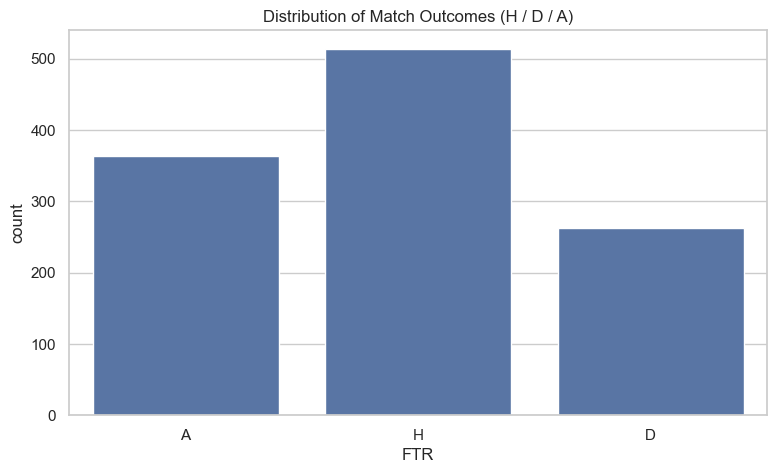

In [14]:
sns.countplot(x=df["FTR"])
plt.title("Distribution of Match Outcomes (H / D / A)")
plt.show()


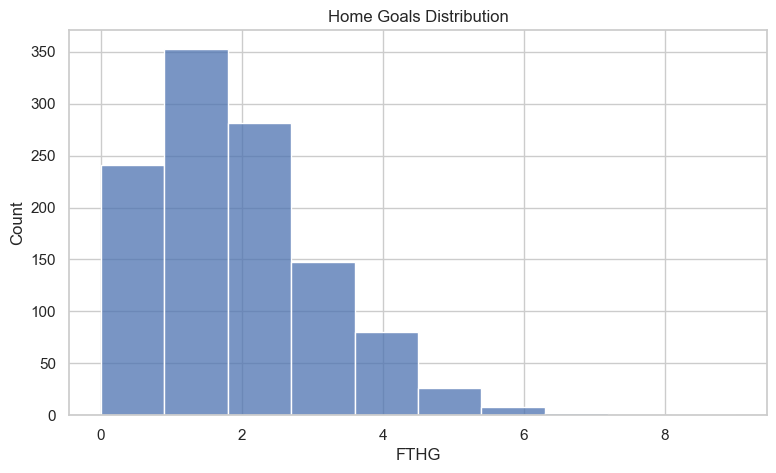

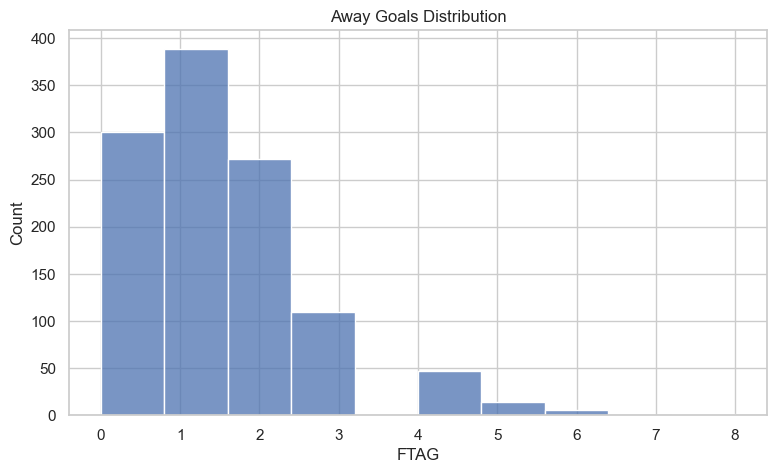

In [16]:
sns.histplot(df["FTHG"], bins=10)
plt.title("Home Goals Distribution")
plt.show()

sns.histplot(df["FTAG"], bins=10)
plt.title("Away Goals Distribution")
plt.show()


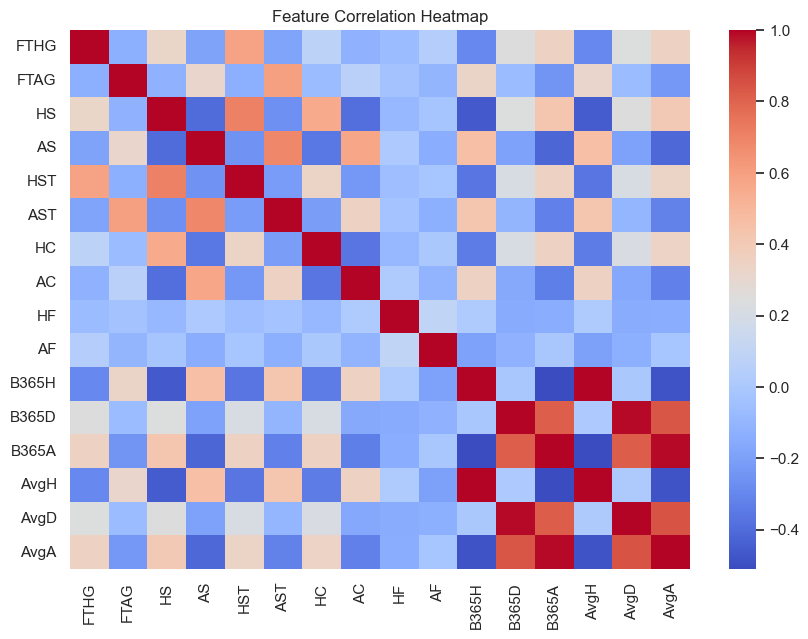

In [18]:
plt.figure(figsize=(10,7))
sns.heatmap(df[feature_cols].corr(), cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


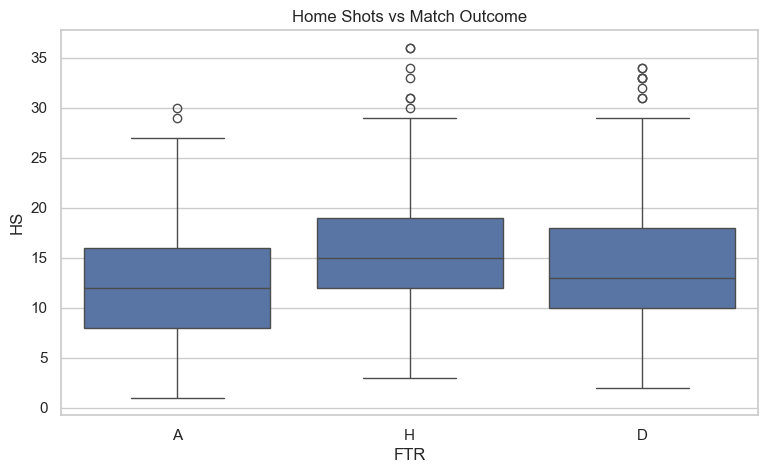

In [46]:
sns.boxplot(x=df["FTR"], y=df["HS"])
plt.title("Home Shots vs Match Outcome")
plt.show()


In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

X_train.shape, X_test.shape


((912, 16), (228, 16))

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Accuracy: 1.0
              precision    recall  f1-score   support

           0      1.000     1.000     1.000       103
           1      1.000     1.000     1.000        52
           2      1.000     1.000     1.000        73

    accuracy                          1.000       228
   macro avg      1.000     1.000     1.000       228
weighted avg      1.000     1.000     1.000       228



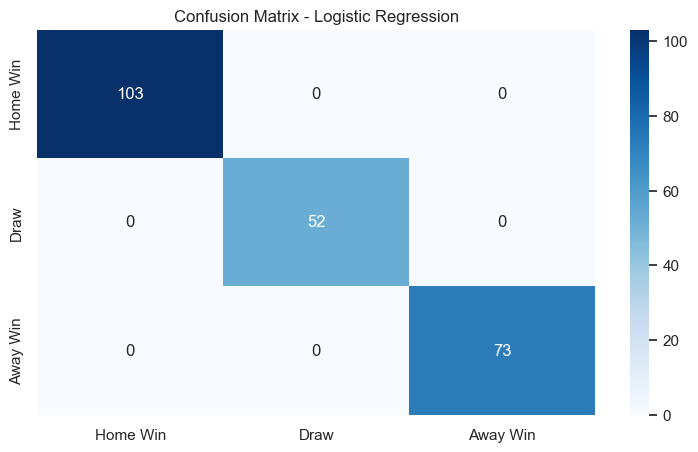

In [28]:
pipe_lr = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(max_iter=1000, multi_class="multinomial"))
])

pipe_lr.fit(X_train, y_train)
y_pred_lr = pipe_lr.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", acc_lr)
print(classification_report(y_test, y_pred_lr, digits=3))

cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Home Win","Draw","Away Win"],
            yticklabels=["Home Win","Draw","Away Win"])
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


Random Forest Accuracy: 0.9736842105263158
              precision    recall  f1-score   support

           0      0.990     1.000     0.995       103
           1      0.960     0.923     0.941        52
           2      0.959     0.973     0.966        73

    accuracy                          0.974       228
   macro avg      0.970     0.965     0.967       228
weighted avg      0.974     0.974     0.974       228



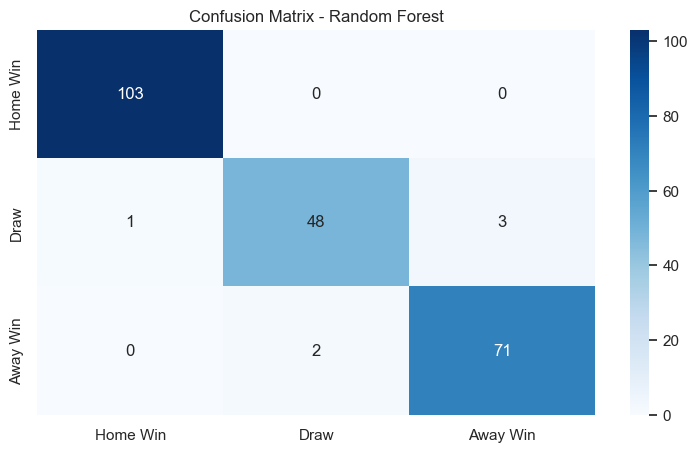

In [30]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)

print("Random Forest Accuracy:", acc_rf)
print(classification_report(y_test, y_pred_rf, digits=3))

cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Home Win","Draw","Away Win"],
            yticklabels=["Home Win","Draw","Away Win"])
plt.title("Confusion Matrix - Random Forest")
plt.show()


SVM Accuracy: 0.9649122807017544
              precision    recall  f1-score   support

           0      0.981     0.990     0.986       103
           1      0.940     0.904     0.922        52
           2      0.959     0.973     0.966        73

    accuracy                          0.965       228
   macro avg      0.960     0.956     0.958       228
weighted avg      0.965     0.965     0.965       228



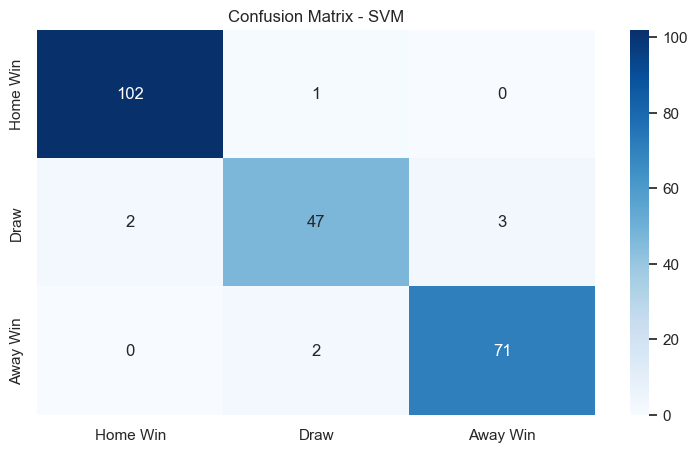

In [32]:
pipe_svm = Pipeline([
    ("scaler", StandardScaler()),
    ("model", SVC(kernel="rbf"))
])

pipe_svm.fit(X_train, y_train)
y_pred_svm = pipe_svm.predict(X_test)

acc_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", acc_svm)
print(classification_report(y_test, y_pred_svm, digits=3))

cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Home Win","Draw","Away Win"],
            yticklabels=["Home Win","Draw","Away Win"])
plt.title("Confusion Matrix - SVM")
plt.show()


KNN Accuracy: 0.7149122807017544
              precision    recall  f1-score   support

           0      0.770     0.913     0.836       103
           1      0.395     0.288     0.333        52
           2      0.794     0.740     0.766        73

    accuracy                          0.715       228
   macro avg      0.653     0.647     0.645       228
weighted avg      0.692     0.715     0.699       228



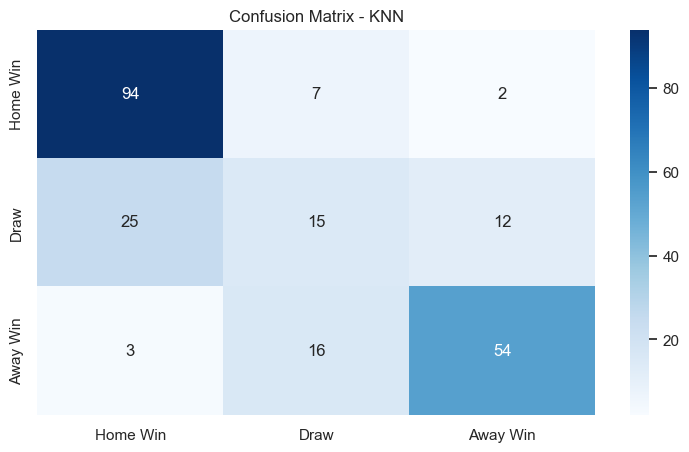

In [34]:
pipe_knn = Pipeline([
    ("scaler", StandardScaler()),
    ("model", KNeighborsClassifier(n_neighbors=7))
])

pipe_knn.fit(X_train, y_train)
y_pred_knn = pipe_knn.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", acc_knn)
print(classification_report(y_test, y_pred_knn, digits=3))

cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Home Win","Draw","Away Win"],
            yticklabels=["Home Win","Draw","Away Win"])
plt.title("Confusion Matrix - KNN")
plt.show()


Gradient Boosting Accuracy: 0.9912280701754386
              precision    recall  f1-score   support

           0      0.990     1.000     0.995       103
           1      1.000     0.962     0.980        52
           2      0.986     1.000     0.993        73

    accuracy                          0.991       228
   macro avg      0.992     0.987     0.990       228
weighted avg      0.991     0.991     0.991       228



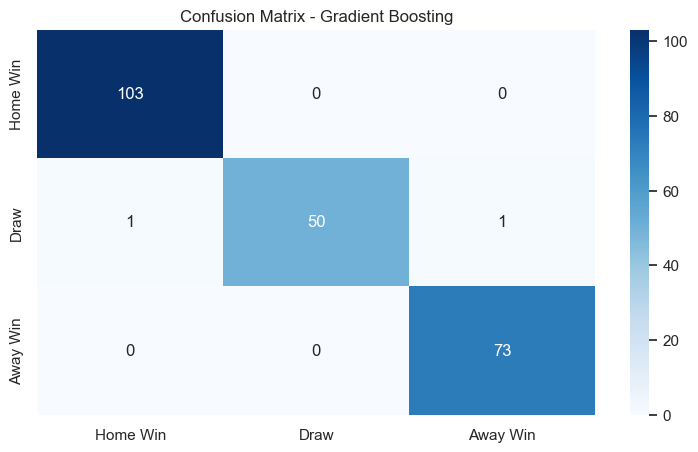

In [36]:
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)
acc_gb = accuracy_score(y_test, y_pred_gb)

print("Gradient Boosting Accuracy:", acc_gb)
print(classification_report(y_test, y_pred_gb, digits=3))

cm_gb = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(cm_gb, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Home Win","Draw","Away Win"],
            yticklabels=["Home Win","Draw","Away Win"])
plt.title("Confusion Matrix - Gradient Boosting")
plt.show()


In [38]:
results_df = pd.DataFrame({
    "Model": [
        "Logistic Regression",
        "Random Forest",
        "SVM",
        "KNN",
        "Gradient Boosting"
    ],
    "Accuracy": [
        acc_lr,
        acc_rf,
        acc_svm,
        acc_knn,
        acc_gb
    ]
})

results_df = results_df.sort_values(by="Accuracy", ascending=False)
results_df


,Model,Accuracy
0,Logistic Regression,1.000000
4,Gradient Boosting,0.991228
1,Random Forest,0.973684
2,SVM,0.964912
3,KNN,0.714912


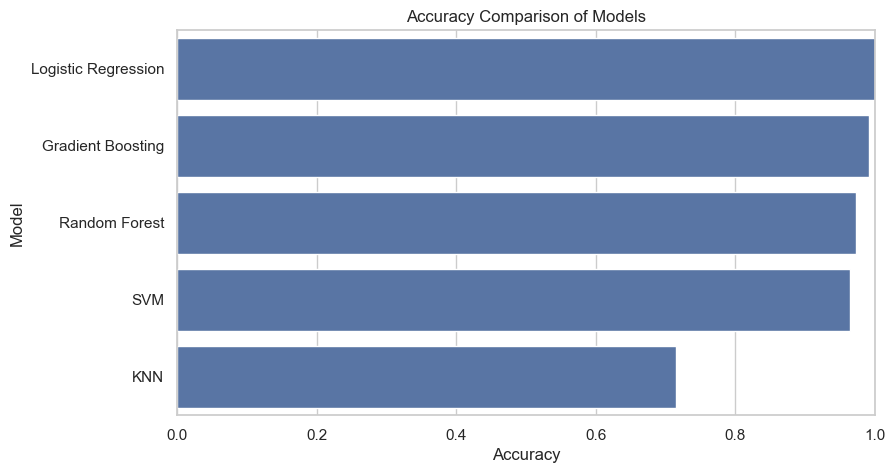

In [40]:
sns.barplot(data=results_df, x="Accuracy", y="Model")
plt.title("Accuracy Comparison of Models")
plt.xlim(0, 1)
plt.show()
